Decoded Data: 'http://goo.gl/4gokF'


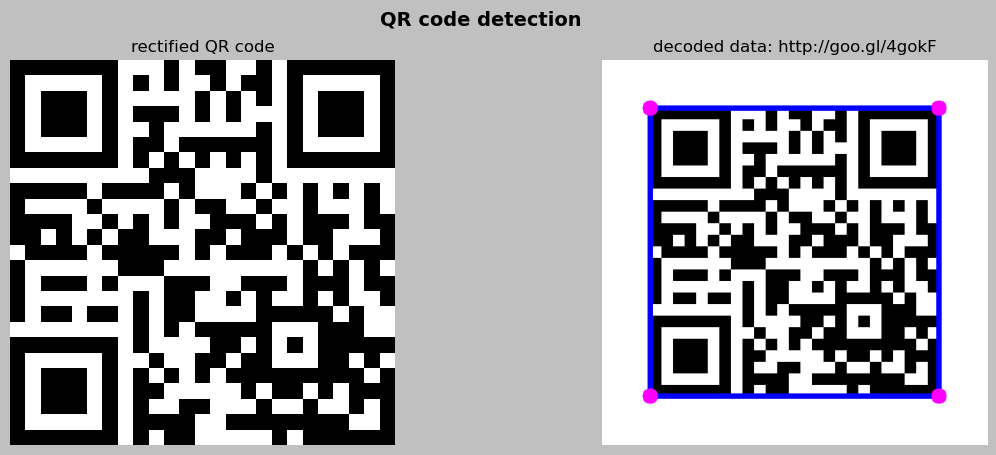

In [3]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

 
def show_img_with_matplotlib(color_img, title, pos): 
     """Shows an image using matplotlib capabilities""" 
 
 
     # Convert BGR image to RGB 
     img_RGB = color_img[:, :, ::-1] 
 
 
     ax = plt.subplot(1, 2, pos) 
     plt.imshow(img_RGB) 
     plt.title(title) 
     plt.axis('off') 
 
 
 
 
def show_qr_detection(img, pts): 
     """Draw both the lines and corners based on the array of vertices of the found QR code""" 
 
 
     pts = np.int32(pts).reshape(-1, 2) 
 
 
     for j in range(pts.shape[0]): 
         cv2.line(img, tuple(pts[j]), tuple(pts[(j + 1) % pts.shape[0]]), (255, 0, 0), 5) 
 
 
     for j in range(pts.shape[0]): 
         cv2.circle(img, tuple(pts[j]), 10, (255, 0, 255), -1) 
 
 
 
 
 # Create the dimensions of the figure and set title: 
fig = plt.figure(figsize=(14, 5)) 
plt.suptitle("QR code detection", fontsize=14, fontweight='bold') 
fig.patch.set_facecolor('silver') 
 
 
 # Load input image: 
image = cv2.imread("Resourches/QR.png") 
 
 
 # Create QR code detector: 
qr_code_detector = cv2.QRCodeDetector()
 
 # Detect and decode the QR code using qr_code_detector.detectAndDecode() 
 # This function returns the data, the array of vertices of the found QR code quadrangle and 
 # the image containing the rectified binarized QR code: 
data, vertices, rectified_qr_code_binarized = qr_code_detector.detectAndDecode(image) 
 
 
if len(data) > 0: 
     print("Decoded Data: '{}'".format(data)) 
     
     # Show the detection in the image: 
     show_qr_detection(image, vertices) 
     # Convert binarized image to uint8: 
     rectified_image = np.uint8(rectified_qr_code_binarized) 
 
     # Plot the images: 
     show_img_with_matplotlib(cv2.cvtColor(rectified_image, cv2.COLOR_GRAY2BGR), "rectified QR code", 1) 
     show_img_with_matplotlib(image, "decoded data: " + data, 2) 
     # Show the Figure: 
     plt.show() 
 
 
else: 
     print("QR Code not detected") 